In [2]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
import expectexception

In [4]:
df_ip = pd.read_csv("../data/code_specialty_ip.csv")
df_op = pd.read_csv("../data/code_specialty_op.csv")
provider = pd.read_csv("../data/train.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
df_ip.shape

(40474, 73)

In [14]:
df_op.shape

(517737, 70)

In [10]:
df = pd.concat([df_ip,df_op],join='inner').merge(provider, on="Provider")

In [11]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology,PotentialFraud
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,7866,1068.0,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66.0,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0,Yes
1,1882,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,45340,1068.0,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,1913-12-01,NaN,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,95.0,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,Yes
2,2964,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,V5789,1068.0,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,1922-10-01,NaN,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0,Yes
3,3311,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,71946,1068.0,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,1930-07-01,NaN,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0,Yes
4,3729,BENE24402,CLM32911,2009-01-08,2009-01-12,PRV55912,3000,PHY380413,PHY432598,NaN,1748,1068.0,2330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8543.0,NaN,NaN,NaN,NaN,NaN,1925-09-01,NaN,2,2,0,39,510,12,12,1,2,2,1,2,2,2,1,2,2,2,3000,1068,8900,740,83.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Yes


In [12]:
df.shape

(558211, 71)

In [16]:
diag = df[["ClaimID",
           "cardiology",
           "urology",
           "endocrinology",        
           "emergency",
           "general",
           "infectious",
           "oncology",
           "hematology",
           "psychiatry",
           "neurology",
           "pulmonology",
           "gastroenterology",
           "ob-gyn",
           "dermatology",
           "orthopedics",
           "congenital",
           "neonatology"
           ]]

In [17]:
diag.head()

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,CLM46614,1,2,2,0,1,0,2,0,0,0,0,0,0,0,1,0,0
1,CLM34721,3,1,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0
2,CLM72336,3,0,0,0,4,0,0,0,0,0,0,1,0,0,2,0,0
3,CLM73394,2,0,2,0,1,1,0,0,0,0,0,0,0,0,2,0,0
4,CLM32911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
diag = diag.fillna(0).set_index('ClaimID')

In [19]:
diag.replace(2, 1,inplace=True)
diag.replace(3, 1,inplace=True)
diag.replace(4, 1,inplace=True)
diag.replace(5, 1,inplace=True)
diag.replace(6, 1,inplace=True)
diag.replace(7, 1,inplace=True)
diag.replace(8, 1,inplace=True)
diag.replace(9, 1,inplace=True)
diag.replace(10, 1,inplace=True)
diag.replace(11, 1,inplace=True)
diag.replace(12, 1,inplace=True)
diag.replace(13, 1,inplace=True)
diag.replace(14, 1,inplace=True)
diag.replace(15, 1,inplace=True)

In [20]:
diag.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
ClaimID,,,,,,,,,,,,,,,,,
CLM46614,1,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0
CLM34721,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0
CLM72336,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
CLM73394,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0
CLM32911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
diag.shape

(558211, 17)

### Most Frequent Items Visualization

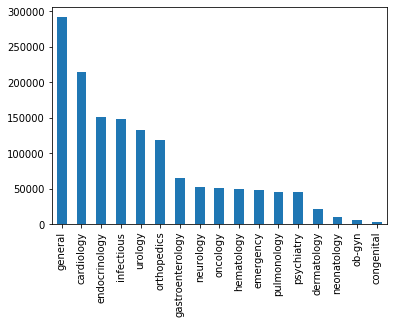

In [22]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

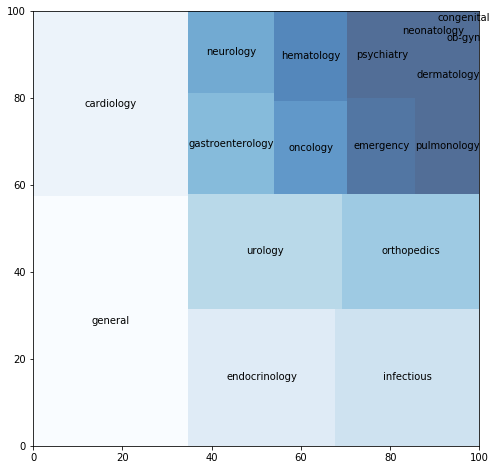

In [23]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

In [38]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cardiology),(urology),0.385381,0.236832,0.112538,0.292018,1.233018,0.021268,1.077948
1,(urology),(cardiology),0.236832,0.385381,0.112538,0.475182,1.233018,0.021268,1.171108
2,(endocrinology),(cardiology),0.270955,0.385381,0.152208,0.561745,1.457636,0.047787,1.402424
3,(cardiology),(endocrinology),0.385381,0.270955,0.152208,0.394954,1.457636,0.047787,1.204941
4,(general),(cardiology),0.522372,0.385381,0.228118,0.436696,1.133154,0.026806,1.091097


In [39]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(cardiology),(urology),0.385381,0.236832,0.112538,0.292018,1.233018,0.021268,1.077948
1,(urology),(cardiology),0.236832,0.385381,0.112538,0.475182,1.233018,0.021268,1.171108
2,(endocrinology),(cardiology),0.270955,0.385381,0.152208,0.561745,1.457636,0.047787,1.402424
3,(cardiology),(endocrinology),0.385381,0.270955,0.152208,0.394954,1.457636,0.047787,1.204941
4,(general),(cardiology),0.522372,0.385381,0.228118,0.436696,1.133154,0.026806,1.091097
5,(cardiology),(general),0.385381,0.522372,0.228118,0.591928,1.133154,0.026806,1.170450
6,(infectious),(cardiology),0.266564,0.385381,0.113294,0.425016,1.102847,0.010565,1.068933
7,(cardiology),(infectious),0.385381,0.266564,0.113294,0.293979,1.102847,0.010565,1.038831
8,(general),(urology),0.522372,0.236832,0.175498,0.335964,1.418576,0.051784,1.149287
9,(urology),(general),0.236832,0.522372,0.175498,0.741025,1.418576,0.051784,1.844301


In [40]:
rules.shape

(14, 9)

In [41]:
rules1 = rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

In [42]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values
conviction=rules['conviction'].values

In [43]:
lift.max()

1.5832805598421438

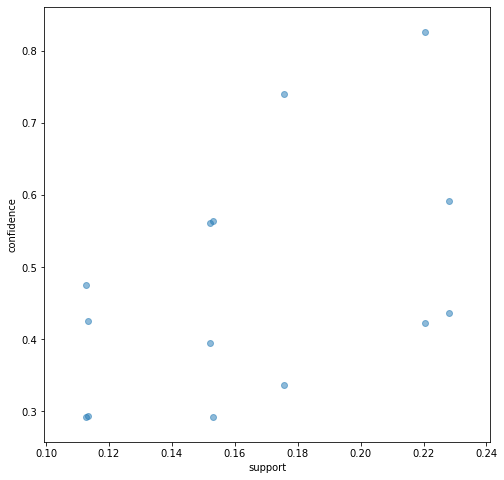

In [44]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

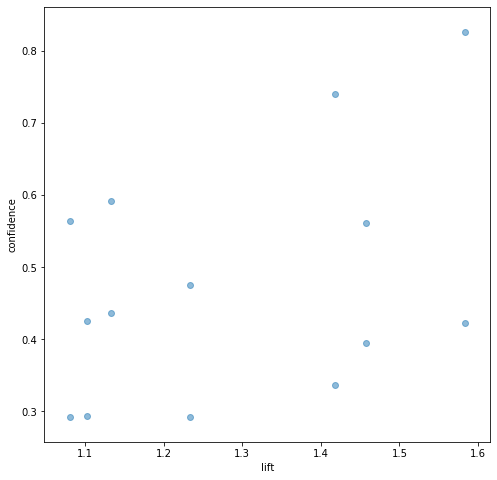

In [45]:
for i in range (len(lift)):
    lift[i] = lift[i]
    confidence[i] = confidence[i]

plt.scatter(lift, confidence, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

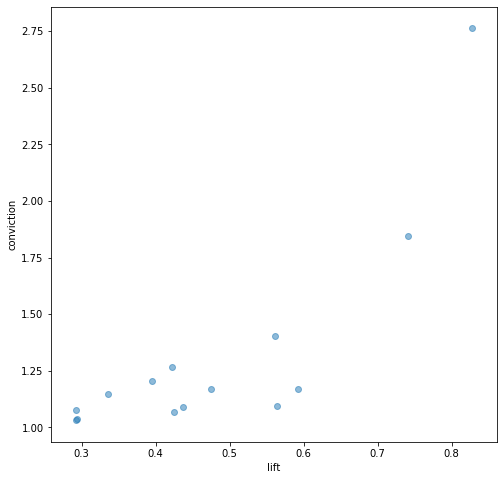

In [46]:
for i in range (len(lift)):
    confidence[i] = confidence[i]
    conviction[i] = conviction[i]

plt.scatter(confidence, conviction, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('conviction') 
plt.show()